<a href="https://colab.research.google.com/github/gerhardteduardo/physics-computational/blob/main/P1_Fiscomp3_Eduardo_Gerhardt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P1 Física Computacional 25/09/2025 — Eduardo Gerhardt

---



# Questionário básico

### 1. Explique a ideia central do método de diferenças finitas. Como se obtém uma aproximação para a derivada de uma função usando pontos de uma malha discreta?


> **Ideia Central do Método de Diferenças Finitas**

A ideia central é resolver equações diferenciais complexas aproximando-as por um sistema de equações de álgebra simples.

Isso é feito em duas etapas:
1. O domínio do problema (uma linha, uma superfície) é transformado em uma grade de pontos (uma malha).
2. As derivadas (taxas de variação) da equação original são substituídas por operações aritméticas simples (subtrações e divisões) que usam apenas os valores da função nos pontos vizinhos da grade.

Dessa forma, uma equação diferencial contínua se torna um grande sistema de equações algébricas, que um computador consegue resolver facilmente para encontrar o valor da função em cada ponto da grade.

> **Aproximação da Derivada na Malha**

A aproximação da derivada é intuitiva: é o análogo discreto da "inclinação" de uma reta. Se você tem pontos em uma grade, a derivada (inclinação) em um ponto pode ser estimada olhando para seus vizinhos:

- Olhando para frente (Progressiva): Usa o ponto atual e o ponto seguinte para calcular a "subida pela distância".

- Olhando para trás (Regressiva): Usa o ponto atual e o ponto anterior.

- Olhando para os dois lados (Central): Usa o ponto da frente e o de trás. Esta costuma ser a aproximação mais precisa, pois captura a tendência local de forma mais equilibrada.

Em essência, calculamos a inclinação local usando os valores que temos disponíveis na nossa grade discreta.

### 2. Qual a diferença entre uma aproximação progressiva, regressiva e centrada para a derivada primeira? Qual delas tende a ser mais precisa, e por quê?


> A diferença entre as aproximações progressiva, regressiva e centrada está em quais pontos da malha discreta (o conceito da questão 1) são usados para estimar a derivada:

- Progressiva: Usa o ponto atual e o da frente.

- Regressiva: Usa o ponto atual e o de trás.

- Centrada: Usa os dois pontos vizinhos (o da frente e o de trás), ignorando o ponto atual.

> A aproximação centrada é a mais precisa porque ela é simétrica. Ao usar informações de ambos os lados do ponto de interesse, ela captura uma "inclinação média" que representa melhor a tendência local da função, cancelando erros que as aproximações de um lado só não conseguem.

### 3. Por que as condições de contorno são fundamentais na resolução de EDPs via métodos numéricos? Dê um exemplo simples em que a escolha da condição de contorno altera completamente a solução.

As condições de contorno são fundamentais porque a equação diferencial (EDP) apenas descreve a "regra local" de como uma grandeza física (como a temperatura) se comporta em qualquer ponto do sistema. Ela não sabe o que acontece nas fronteiras. Sem as condições de contorno, existe um número infinito de soluções possíveis para a mesma EDP. As condições de contorno fornecem a informação global que "ancora" a solução, selecionando a única que corresponde à realidade física do problema.

Exemplo: Uma barra de metal com um pulso de calor
O exemplo a seguir usa o mesmo código inicial e a mesma EDP (equação do calor), mas aplica duas condições de contorno diferentes para mostrar como a solução é alterada.

- Caso 1 (Dirichlet): As pontas da barra são mantidas a uma temperatura fixa de 0°C. O calor pode escapar do sistema.

- Caso 2 (Neumann): As pontas da barra são perfeitamente isoladas. O calor não pode escapar ($\frac{\partial T}{\partial x} = 0$), conservando a energia total do sistema.

### 4. O que se entende por estabilidade em um método numérico aplicado a EDPs evolutivas (como a equação do calor)? Como a condição de estabilidade se manifesta no esquema FTCS?

> O que é Estabilidade?
Estabilidade significa que pequenos erros, que sempre existem em uma simulação, não crescem de forma descontrolada e destroem o resultado.

Um método estável "amortece" ou controla esses erros, mantendo a solução fisicamente coerente.

Um método instável amplifica os erros a cada passo, fazendo a simulação "explodir" com valores absurdos.

Estabilidade no Esquema FTCS
O método FTCS (usado nos códigos anteriores) é condicionalmente estável. Isso significa que ele só funciona se a seguinte regra for obedecida:

$$
\frac{\alpha \Delta t}{(\Delta x)^2} \le \frac{1}{2}
$$

> Como isso se manifesta na prática?

A regra impõe um limite no tamanho do passo de tempo (Δt). Você não pode usar um passo de tempo grande se sua malha espacial (Δx) for muito fina. Se você refinar a malha para ter mais precisão, é obrigado a diminuir drasticamente o passo de tempo para evitar que a simulação se torne instável e "exploda".

### 5. Na equação de difusão unidimensional $u_t = D u_{xx}$, qual o significado físico dos parâmetros e termos presentes? Por que esse tipo de equação é um bom modelo para introduzir métodos numéricos?


> Significado Físico dos Termos
A equação é $u_t = D u_{xx}$, que em notação de derivadas parciais é:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

Vamos analisar cada termo:

$u(x, t)$: Representa a densidade ou concentração de alguma quantidade (calor, partículas, etc.) na posição $x$ e no tempo $t$. Por exemplo, pode ser a temperatura em um ponto de uma barra.


$u_t = \frac{\partial u}{\partial t}$ (Termo da Esquerda): É a taxa de variação temporal da concentração em um ponto fixo $x$. Se for positivo, a concentração naquele ponto está aumentando; se for negativo, está diminuindo.


$u_{xx} = \frac{\partial^2 u}{\partial x^2}$ (Termo da Direita): Este é o termo mais importante. Ele representa a curvatura (ou concavidade) do perfil de concentração no espaço.


- Intuição: A segunda derivada mede o quanto um ponto difere da média de seus vizinhos.

- Se $u_{xx} > 0$ (curva "côncava para cima", como um vale), significa que o ponto tem uma concentração menor que a média de seus vizinhos. A difusão agirá para aumentar a concentração ali.

- - Se $u_{xx} < 0$ (curva "côncava para baixo", como um morro), o ponto é um máximo local. A difusão agirá para diminuir a concentração, espalhando-a para os lados.

A equação inteira diz: a variação no tempo ($u_t$) é proporcional à curvatura ($u_{xx}$). Onde a "curva" de temperatura é mais acentuada, a mudança é mais rápida.

$D$ (Coeficiente de Difusão): É uma constante do material que mede a rapidez com que a difusão ocorre. Um $D$ grande (como calor em metal) significa que a concentração se espalha e se uniformiza rapidamente. Um $D$ pequeno (como calor em madeira) significa um processo lento.

> Por que é um Bom Modelo para Introduzir Métodos Numéricos?
A equação da difusão é um excelente ponto de partida por várias razões:

Simplicidade e Relevância: É uma das EDPs mais simples que descreve um processo físico real e fundamental (o "espalhamento" de coisas).

Intuição Física Clara: O comportamento da solução é muito intuitivo. Sabemos que picos de concentração devem se suavizar e espalhar com o tempo. Isso ajuda a verificar visualmente se o método numérico está produzindo um resultado sensato.

Laboratório de Conceitos: É o modelo perfeito para introduzir todos os conceitos essenciais da área:

- Discretização: Como transformar derivadas em álgebra (diferenças finitas).

- Condições de Contorno: Permite explorar facilmente os tipos Dirichlet e Neumann.

- Estabilidade Numérica: É o exemplo clássico para demonstrar por que um método pode "explodir" e como a relação entre $\Delta t$ e $\Delta x$ é crucial.

Base para Equações Mais Complexas: Os métodos aprendidos para resolver a equação da difusão são a base para resolver equações muito mais complexas, como a equação de Schrödinger em mecânica quântica ou as equações de Navier-Stokes em fluidodinâmica.

### 6. Ao implementar um método numérico para resolver uma EDP simples, como podemos verificar se o código está correto e se os resultados são confiáveis? Dê pelo menos duas estratégias práticas.


> Há duas estratégias praticas

1. Comparação com Soluções Analíticas (Casos de Teste)
Esta é a forma mais rigorosa de verificação. A estratégia consiste em testar o código em um cenário simplificado para o qual existe uma solução matemática exata (analítica).

- Passo 1: Encontrar um caso de teste. Para a equação da difusão $u_t = D u_{xx}$, um caso clássico é uma barra de comprimento $L$ com as pontas mantidas em temperatura zero ($u(0,t) = u(L,t) = 0$) e uma condição inicial senoidal.

  - Condição Inicial: $u(x,0) = \sin\left(\frac{\pi x}{L}\right)$

  - Solução Analítica Exata: $u(x,t) = e^{-D (\pi/L)^2 t} \sin\left(\frac{\pi x}{L}\right)$

- Passo 2: Implementar e Comparar. Configure sua simulação com essa condição inicial e condições de contorno. Em seguida, para um determinado tempo $t$, plote o resultado do seu código numérico e o resultado da fórmula da solução analítica no mesmo gráfico.

- Critério de Sucesso: Se o código estiver correto, as duas curvas (numérica e analítica) devem se sobrepor quase perfeitamente. Qualquer desvio significativo aponta para um erro na implementação.

2. Análise de Convergência (Refinamento da Malha)
Esta estratégia é usada quando não há uma solução analítica disponível e se baseia na ideia de que, à medida que a discretização se torna mais fina, a solução numérica deve se aproximar da solução real.

- Passo 1: Rodar a simulação com diferentes resoluções. Resolva o mesmo problema físico múltiplas vezes, aumentando a resolução da malha a cada vez.

  - Simulação 1 (Grosseira): Use um número de pontos $N$ na malha.

  - Simulação 2 (Média): Use $2N$ pontos.

  - Simulação 3 (Fina): Use $4N$ pontos.

  - Lembre-se que ao refinar a malha espacial ($\Delta x$), você provavelmente precisará ajustar o passo de tempo ($\Delta t$) para manter a estabilidade.

- Passo 2: Comparar os resultados. Plote os perfis de solução final de todas as simulações no mesmo gráfico.

- Critério de Sucesso: À medida que a malha é refinada, as curvas devem "convergir", ou seja, ficar cada vez mais próximas umas das outras, tendendo a uma forma limite estável. Se a solução muda drasticamente ou continua oscilando de forma estranha mesmo com malhas muito finas, isso indica um problema de instabilidade ou um erro no código.

### 7. Explique como se determina a ordem do erro de truncamento de uma fórmula de diferenças finitas. Use como exemplo a aproximação centrada da primeira derivada com três pontos:
$$
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 - h)}{2h}
$$
### Mostre, a partir da expansão em série de Taylor, quais termos são eliminados e qual é o erro dominante

Para determinar a ordem do erro, usamos a expansão em série de Taylor para os termos $f(x_0+h)$ e $f(x_0-h)$.

1. Expansões em Série de Taylor:

$f(x_0+h) = f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + \frac{h^3}{6} f'''(x_0) + \dots$

$f(x_0-h) = f(x_0) - h f'(x_0) + \frac{h^2}{2} f''(x_0) - \frac{h^3}{6} f'''(x_0) + \dots$

2. Subtração:
Subtraindo a segunda linha da primeira, os termos de ordem par ($h^0$, $h^2$, etc.) são eliminados. O resultado é:
$$
f(x_0+h) - f(x_0-h) = 2h f'(x_0) + \frac{h^3}{3} f'''(x_0) + \dots
$$

3. Isolando a Derivada:
Agora, dividimos por $2h$ para obter a fórmula da aproximação:
$$
\frac{f(x_0+h) - f(x_0-h)}{2h} = f'(x_0) + \frac{h^2}{6} f'''(x_0) + \dots
$$

A equação mostra que nossa aproximação (lado esquerdo) é igual à derivada exata ($f'(x_0)$) mais um conjunto de termos que constituem o erro.

4. Conclusão:
O erro de truncamento é a diferença entre o valor exato e a aproximação. O primeiro termo do erro, que é o erro dominante, é $- \frac{h^2}{6} f'''(x_0)$.

Como a menor potência de $h$ no erro é $h^2$, dizemos que a aproximação centrada é de segunda ordem, ou $O(h^2)$.

### 8. Compare os efeitos de dispersão numérica e dissipação numérica em métodos de diferenças finitas para EDPs. Explique, em palavras, o que cada efeito significa. Dê um exemplo de um esquema numérico que apresenta predominantemente dissipação e outro que apresenta predominantemente dispersão.


Dispersão e dissipação numérica são dois tipos de erro que surgem ao discretizar uma EDP. Ambos distorcem a solução, mas de maneiras fundamentalmente diferentes. Eles são mais fáceis de visualizar em equações que descrevem transporte ou ondas, como a equação de advecção ($u_t + c u_x = 0$).

> Dissipação Numérica

O que é: É um efeito de amortecimento artificial introduzido pelo método numérico. O esquema faz com que a amplitude das ondas na solução diminua com o tempo, mesmo que a física do problema diga que a amplitude deveria ser conservada.

Efeito Visual: A dissipação "suaviza" ou "borra" a solução. Picos tornam-se mais baixos e largos, e qualquer descontinuidade ou gradiente acentuado (como uma onda quadrada) fica arredondado. É como se o método adicionasse uma viscosidade ou atrito fantasma ao sistema.

> Dispersão Numérica

O que é: É um efeito de erro de fase. Ocorre quando o método numérico faz com que ondas de diferentes comprimentos de onda viajem em velocidades diferentes na malha, mesmo que na equação real todas devessem viajar na mesma velocidade $c$.

Efeito Visual: A dispersão distorce a forma da solução ao separar seus componentes de frequência. Um pulso que deveria se mover como um bloco coeso se desfaz, tipicamente gerando uma trilha de oscilações espúrias (ou "rabiscos") que não existem na solução real.

> Exemplos de Esquemas

Esquema Predominantemente Dissipativo: O método Upwind de 1ª ordem (ou Contra-Corrente). É um método muito robusto e estável, mas famoso por sua alta dissipação numérica. Ele é excelente para evitar oscilações, mas ao custo de borrar significativamente a solução.

Esquema Predominantemente Dispersivo: O método Leapfrog (CTCS - Centered in Time, Centered in Space). Este é um método de 2ª ordem que não possui dissipação numérica intrínseca. Como resultado, ele preserva muito bem a amplitude das ondas, mas sofre de erros de dispersão significativos, o que gera as oscilações espúrias características na solução.

# Problemas numéricos em Python

### Problema 1 — Equação de Poisson 1D com contorno assimétrico

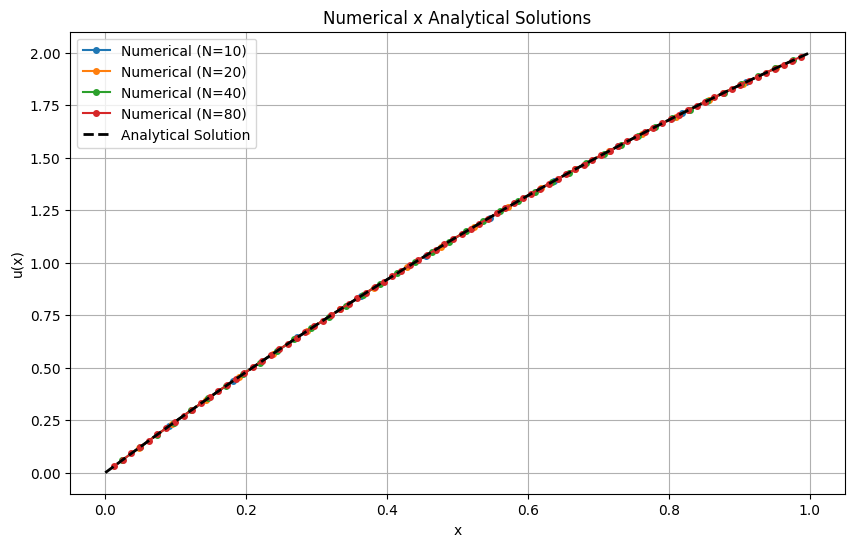

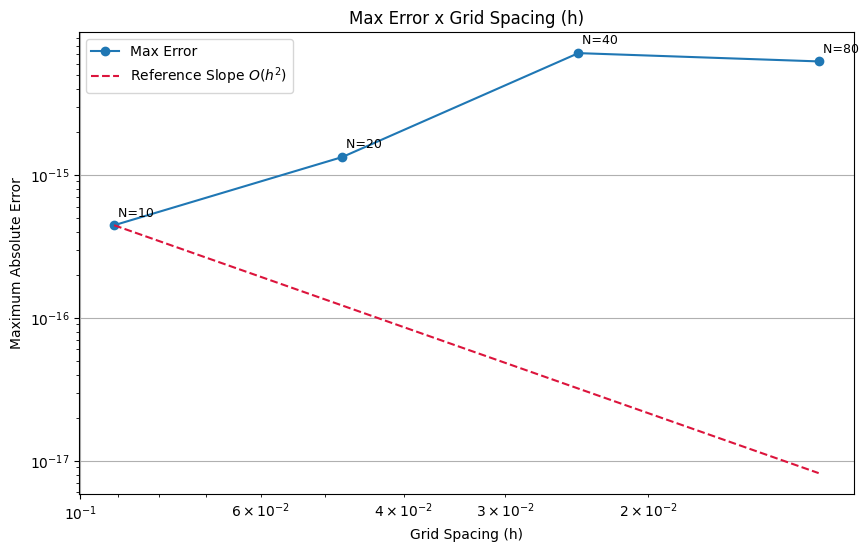

In [44]:
## IMPORTS ##

import numpy as np
import matplotlib.pyplot as plt

## DEFINES ##

DOMAIN_START = 0.0
DOMAIN_END = 1.0
BOUNDARY_U0 = 0.0  # u(0) = 0
BOUNDARY_U1 = 2.0  # u(1) = 2

## MATH FUNCTIONS ##

def assemble_laplacian_matrix(N):
    """Assembles the 1D Laplacian matrix 'A' using a central difference scheme."""
    main_diag = 2 * np.ones(N)
    off_diag = -1 * np.ones(N - 1)
    A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    return A

def assemble_rhs_vector(N, h, bc_start, bc_end):
    """Assembles the right-hand-side vector 'b', including source and BCs."""
    b = h**2 * np.ones(N)  # Source term contribution
    b[0] += bc_start      # Boundary condition at start
    b[-1] += bc_end       # Boundary condition at end
    return b

def get_analytical_solution(x):
    return -0.5 * x**2 + 2.5 * x

## PLOT FUNCTIONS ##

def plot_solutions(simulation_results):
    """
    Plots numerical solutions and the exact solution.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Numerical x Analytical Solutions")
    plt.xlabel("x")
    plt.ylabel("u(x)")

    for result in simulation_results:
        label = f"Numerical (N={result['N']})"
        plt.plot(result['x'], result['u'], 'o-', markersize=4, label=label)
    x_fine = np.linspace(DOMAIN_START, DOMAIN_END, 200)
    u_analytical_fine = get_analytical_solution(x_fine)
    plt.plot(x_fine, u_analytical_fine, '--', color='black', linewidth=2, label='Analytical Solution')
    plot_finalization()

def plot_convergence(h_values, max_errors, N_values):
    """
    log-log plot to see the convergence of the maximum error.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Max Error x Grid Spacing (h)")
    plt.xlabel("Grid Spacing (h)")
    plt.ylabel("Maximum Absolute Error")

    plt.loglog(h_values, max_errors, 'o-', label='Max Error')
    for N, h, err in zip(N_values, h_values, max_errors):
        plt.text(h, err * 1.1, f' N={N}', verticalalignment='bottom', fontsize=9)
    C = max_errors[0] / (h_values[0]**2)
    h_ref = np.array(h_values)
    error_ref = C * h_ref**2
    plt.loglog(h_ref, error_ref, '--', color='crimson', label='Reference Slope $O(h^2)$')
    plt.gca().invert_xaxis()
    plot_finalization()

def plot_finalization():
    plt.grid()
    plt.legend()
    plt.show()

## MAIN CODE ##

N_grid_sizes = [10, 20, 40, 80]

all_results = []
h_values = []
max_errors = []

for N in N_grid_sizes:
    # 1. Setup grid
    h = (DOMAIN_END - DOMAIN_START) / (N + 1)
    x_grid = np.linspace(DOMAIN_START + h, DOMAIN_END - h, N)

    # 2. Assemble and solve the linear system
    A = assemble_laplacian_matrix(N)
    b = assemble_rhs_vector(N, h, BOUNDARY_U0, BOUNDARY_U1)
    u_numerical = np.linalg.solve(A, b)

    # 3. Calculate error against the analytical solution
    u_analytical = get_analytical_solution(x_grid)
    error = np.max(np.abs(u_numerical - u_analytical))

    # 4. Store all computed data
    all_results.append({'N': N, 'x': x_grid, 'u': u_numerical})
    h_values.append(h)
    max_errors.append(error)

plot_solutions(all_results)
plot_convergence(h_values, max_errors, N_grid_sizes)

### Problema 2 — Pulso gaussiano na equação da onda

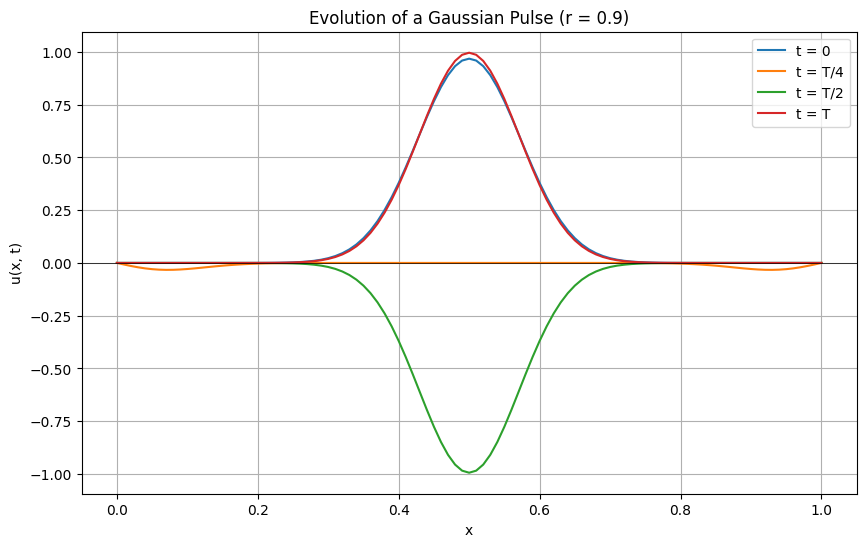



  Discussão sobre a Preservação da Forma do Pulso

  1. Divisão Inicial: O pulso gaussiano inicial em t=0 divide-se imediatamente em dois pulsos
    de meia amplitude viajando em direções opostas. Isso é visível em t=T/4.

  2. Reflexão nas Bordas: A simulação usa condições de contorno de Dirichlet homogêneas (u=0),
    que modelam extremidades fixas. Quando um pulso atinge uma extremidade fixa, ele é
    refletido e se torna invertido (sua fase muda em 180 graus).

  3. Preservação da Forma: O esquema numérico preserva a forma dos pulsos razoavelmente bem.
    Após a reflexão, os dois pulsos invertidos (negativos) viajam de volta para o centro.
    Em t=T/2, eles se encontram e interferem destrutivamente, resultando em um pulso
    completamente invertido no meio.

  4. Período Completo: Em t=T, os pulsos refletiram nas paredes opostas e retornaram ao
    centro, recriando o pulso positivo original. Alguns pequenos erros numéricos (dispersão),
    vistos como pequenas oscilações, po

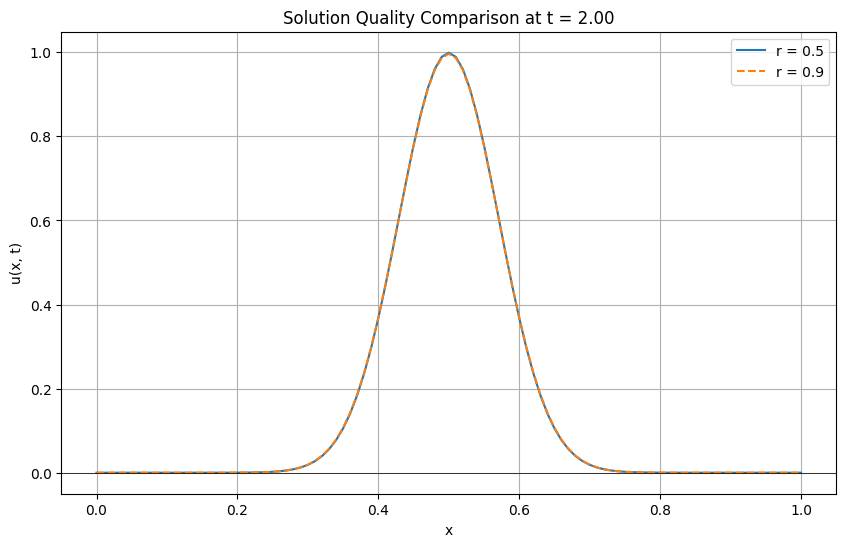



  Discussão sobre o efeito de r = c*dt/dx:

  1. Dispersão Numérica: Os gráficos comparam a forma do pulso em t=T para r=0.5 e r=0.9.
    A solução para r=0.5 exibe significativamente mais dispersão numérica. Isso é visível
    como um rastro de oscilações espúrias de alta frequência (ruído) atrás do pulso principal.

  2. Precisão: No esquema explícito de diferenças finitas para a equação da onda, a solução
    é frequentemente mais precisa quando o parâmetro CFL 'r' está próximo do seu limite de
    estabilidade de 1. Um 'r' menor força um passo de tempo (dt) muito menor em relação
    ao espaçamento da malha (dx), o que pode levar ao acúmulo de erros de fase ao longo
    de muitos passos de tempo, causando a dispersão observada.

  3. Conclusão: A qualidade da solução é altamente sensível a 'r'. Para este problema,
    r=0.9 produz um resultado muito mais 'limpo' e fisicamente preciso do que r=0.5.
  




In [55]:
## IMPORTS ##

import numpy as np
import matplotlib.pyplot as plt
import warnings

## DEFINES ##

DOMAIN_START = 0.0
DOMAIN_END = 1.0
C_WAVE_SPEED = 1.0      # Speed of wave propagation
NX = 101                # Number of spatial grid points (including boundaries)

## MATH FUNCTIONS ##

def get_initial_state(x):
    """Returns the initial Gaussian pulse u(x, 0)."""
    return np.exp(-100 * (x - 0.5)**2)

def run_wave_simulation(r_cfl, plot_times):
    """
    Runs the 1D wave equation simulation using an explicit finite difference scheme.
    """
    if r_cfl > 1.0:
        warnings.warn(f"Warning: CFL parameter r={r_cfl} > 1. This will be unstable.")

    # 1. Setup grid and time step
    dx = (DOMAIN_END - DOMAIN_START) / (NX - 1)
    dt = r_cfl * dx / C_WAVE_SPEED
    x = np.linspace(DOMAIN_START, DOMAIN_END, NX)

    # 2. Initialize solution arrays
    # We need three time levels for the scheme: past, current, future
    u_past = get_initial_state(x)
    u_current = np.zeros_like(u_past)
    u_future = np.zeros_like(u_past)

    # Store results (snapshots) for plotting
    snapshots = {}
    if 0 in plot_times:
        snapshots[0] = u_past.copy()

    # 3. Special first time step using u_t(x, 0) = 0
    # u_i^1 = u_i^0 + (r^2/2) * (u_{i+1}^0 - 2u_i^0 + u_{i-1}^0)
    for i in range(1, NX - 1):
        u_current[i] = u_past[i] + (r_cfl**2 / 2.0) * (u_past[i+1] - 2*u_past[i] + u_past[i-1])

    # 4. Main time-stepping loop
    time = dt
    plot_times_idx = 0
    while plot_times_idx < len(plot_times):
        # Update solution using the central difference scheme
        # u_i^{n+1} = 2(1-r^2)u_i^n + r^2(u_{i+1}^n + u_{i-1}^n) - u_i^{n-1}
        for i in range(1, NX - 1):
            term1 = 2.0 * (1.0 - r_cfl**2) * u_current[i]
            term2 = r_cfl**2 * (u_current[i+1] + u_current[i-1])
            term3 = u_past[i]
            u_future[i] = term1 + term2 - term3

        # Advance time levels
        u_past = u_current.copy()
        u_current = u_future.copy()
        time += dt

        # Store snapshot if the current time is close to a requested plot time
        if plot_times_idx < len(plot_times) and time >= plot_times[plot_times_idx]:
            snapshots[plot_times[plot_times_idx]] = u_current.copy()
            plot_times_idx += 1
            # If we need to capture the last time step exactly
            if plot_times_idx == len(plot_times):
                break

    return snapshots, x

## PLOT FUNCTIONS ##

def plot_wave_evolution(snapshots, x, T):
    """Plots the snapshots of the wave pulse at different times."""
    plt.figure(figsize=(10, 6))
    plt.title("Evolution of a Gaussian Pulse (r = 0.9)")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")

    for t, u in snapshots.items():
        if abs(t - 0) < 1e-9: label = "t = 0"
        elif abs(t - T/4) < 1e-9: label = "t = T/4"
        elif abs(t - T/2) < 1e-9: label = "t = T/2"
        elif abs(t - T) < 1e-9: label = "t = T"
        else: label = f"t = {t:.2f}"
        plt.plot(x, u, label=label)

    plot_finalization()

def plot_cfl_comparison(snapshot_r1, snapshot_r2, x, t):
    """Compares the solution quality for two different CFL parameters."""
    plt.figure(figsize=(10, 6))
    plt.title(f"Solution Quality Comparison at t = {t:.2f}")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")

    plt.plot(x, snapshot_r1, label="r = 0.5")
    plt.plot(x, snapshot_r2, label="r = 0.9", linestyle='--')

    plot_finalization()

def plot_finalization():
    plt.grid()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.show()

## LOG FUNCTIONS ##

def display_task3_discussion_pt():
  print("\n" + "="*50)
  print("""
  Discussão sobre a Preservação da Forma do Pulso

  1. Divisão Inicial: O pulso gaussiano inicial em t=0 divide-se imediatamente em dois pulsos
    de meia amplitude viajando em direções opostas. Isso é visível em t=T/4.

  2. Reflexão nas Bordas: A simulação usa condições de contorno de Dirichlet homogêneas (u=0),
    que modelam extremidades fixas. Quando um pulso atinge uma extremidade fixa, ele é
    refletido e se torna invertido (sua fase muda em 180 graus).

  3. Preservação da Forma: O esquema numérico preserva a forma dos pulsos razoavelmente bem.
    Após a reflexão, os dois pulsos invertidos (negativos) viajam de volta para o centro.
    Em t=T/2, eles se encontram e interferem destrutivamente, resultando em um pulso
    completamente invertido no meio.

  4. Período Completo: Em t=T, os pulsos refletiram nas paredes opostas e retornaram ao
    centro, recriando o pulso positivo original. Alguns pequenos erros numéricos (dispersão),
    vistos como pequenas oscilações, podem aparecer, degradando levemente a forma ao longo
    de longos períodos.
  """)
  print("\n")

def display_task4_discussion_pt():
  print("\n" + "="*50)
  print("""
  Discussão sobre o efeito de r = c*dt/dx:

  1. Dispersão Numérica: Os gráficos comparam a forma do pulso em t=T para r=0.5 e r=0.9.
    A solução para r=0.5 exibe significativamente mais dispersão numérica. Isso é visível
    como um rastro de oscilações espúrias de alta frequência (ruído) atrás do pulso principal.

  2. Precisão: No esquema explícito de diferenças finitas para a equação da onda, a solução
    é frequentemente mais precisa quando o parâmetro CFL 'r' está próximo do seu limite de
    estabilidade de 1. Um 'r' menor força um passo de tempo (dt) muito menor em relação
    ao espaçamento da malha (dx), o que pode levar ao acúmulo de erros de fase ao longo
    de muitos passos de tempo, causando a dispersão observada.

  3. Conclusão: A qualidade da solução é altamente sensível a 'r'. Para este problema,
    r=0.9 produz um resultado muito mais 'limpo' e fisicamente preciso do que r=0.5.
  """)
  print("\n")

## MAIN CODE ##

# The fundamental period T of a string of length L is 2L/c. Here L=1, c=1.
T_period = 2.0 * (DOMAIN_END - DOMAIN_START) / C_WAVE_SPEED
plot_times_evolution = [0, T_period/4, T_period/2, T_period]

snapshots_evolution, x_grid = run_wave_simulation(r_cfl=0.9, plot_times=plot_times_evolution)
plot_wave_evolution(snapshots_evolution, x_grid, T_period)

display_task3_discussion_pt()

comparison_time = [T_period]
snapshots_r05, x_grid_r05 = run_wave_simulation(r_cfl=0.5, plot_times=comparison_time)
snapshots_r09, x_grid_r09 = run_wave_simulation(r_cfl=0.9, plot_times=comparison_time)

# Compare the final state (at t=T) for both simulations
plot_cfl_comparison(snapshots_r05[T_period], snapshots_r09[T_period], x_grid_r05, T_period)

display_task4_discussion_pt()